In [ ]:
# this ml model will be terained on the data from the provided data set. 
# this data consists of dates from 1 jan 2015 to 28 feb 2015 
# and it contains the tota no. vehicals used on that day and the number of trips 
# based on the information given in thsi data set we can make a model which 
#will be capable of predictig the no of trips based on the no the base station and the no of vehicals use. 

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [16]:
df['date'] = pd.to_datetime(df['date'])


df['day_of_month'] = df['date'].dt.day  
df['month'] = df['date'].dt.month 

In [19]:
X = df[['day_of_month', 'active_vehicles']]  
y = df['trips'] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1224.9624443535984
R-squared: 0.9701823357080848


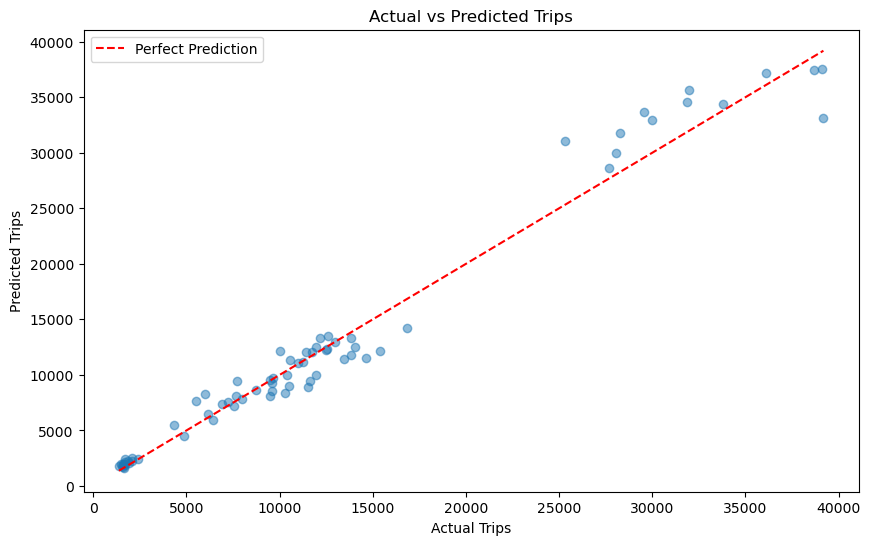

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.legend()
plt.show()

In [27]:
print("\nPlease enter the following details:")
date_input = input("Enter the date (DD/MM/YYYY): ")


Please enter the following details:


In [28]:
try:
    new_date = pd.to_datetime(date_input, format='%d/%m/%Y')
except ValueError:
    print("Invalid date format. Please enter the date in DD/MM/YYYY format.")
    exit()

In [30]:
try:
    new_active_vehicles = int(input("Enter the number of active vehicles: "))
except ValueError:
    print("Invalid input. Please enter a valid integer for active vehicles.")
    exit()


In [31]:
new_day_of_month = new_date.day
new_input = np.array([[new_day_of_month, new_active_vehicles]])
scaled_input = scaler.transform(new_input)
predicted_trips = model.predict(scaled_input)



c:\Users\kushw\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
print(f"\nPredicted number of trips for {new_date.date()} with {new_active_vehicles} active vehicles: {predicted_trips[0]:.0f} trips")



Predicted number of trips for 2022-11-15 with 222 active vehicles: 1855 trips
